## Load Brent oil prices data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Brent oil prices data
data = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')
# Display the first few rows of the dataset
print(data.head())

C:\Users\segni\AppData\Local\Temp\ipykernel_1944\2109513630.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


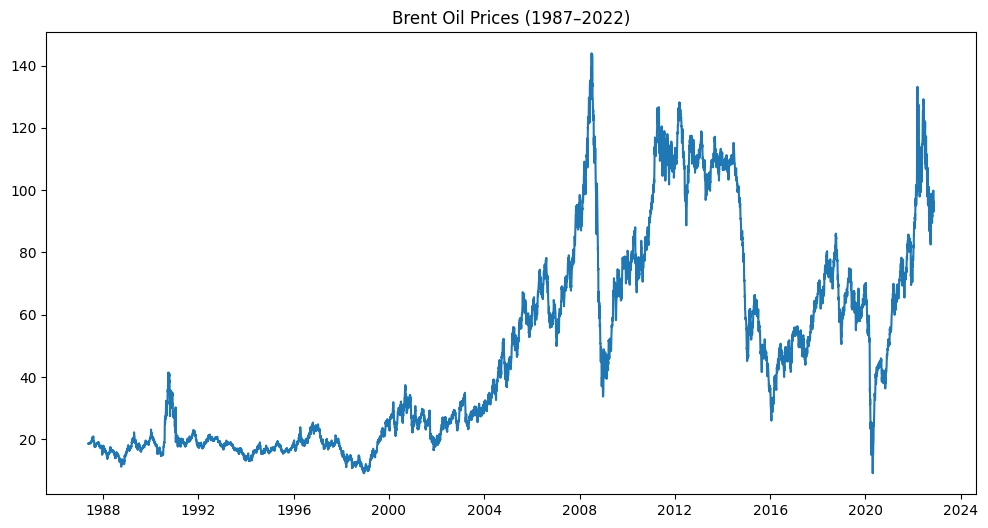

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title("Brent Oil Prices (1987–2022)")

# save the plot
plt.savefig('../reports/figure/brent_oil_prices.png')

### Check missing data

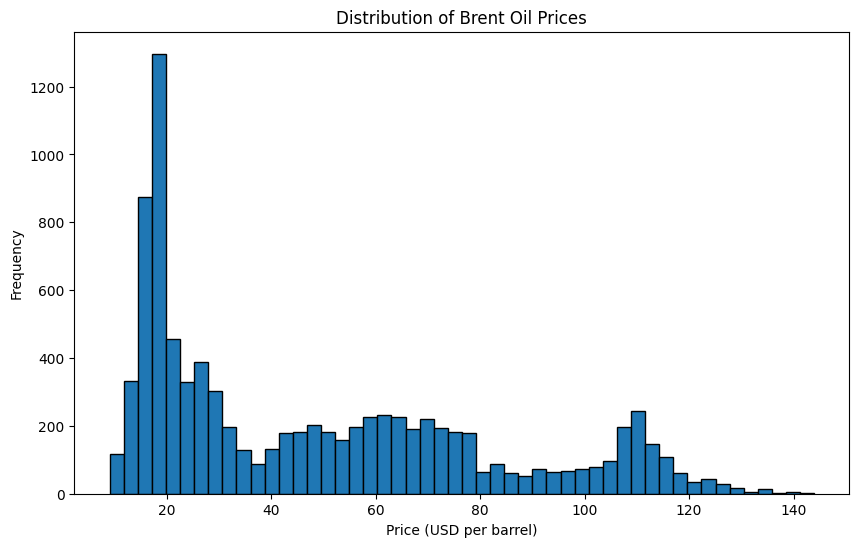

In [20]:
plt.figure(figsize=(10, 6))

data['Price'].plot(kind='hist', bins=50, edgecolor='black')
plt.title("Distribution of Brent Oil Prices")
plt.xlabel("Price (USD per barrel)")
plt.ylabel("Frequency")
plt.savefig('../reports/figure/brent_oil_price_distribution.png')

In [21]:
# Check for missing date times
missing_dates = data.index[data.index.to_series().diff() > pd.Timedelta('1D')]
if not missing_dates.empty:
    print("Missing dates found in the dataset:")
    print(len(missing_dates), "missing dates")

Missing dates found in the dataset:
1895 missing dates


In [22]:
data.shape

(9011, 1)

## fill missed data value (forward filling)

In [23]:
# add missing date with null value data
data = data.asfreq('D')
# fill missed data value (forward filling)

print("data shape after filling missing values:", data.shape)

# fill window forward filling 10 days
data['Price'] = data['Price'].fillna(method='ffill', limit=10)

# Check for missing values after filling
missing_values = data.isnull().sum()
if missing_values.any():
    print("Missing values still present in the dataset:")
    print(missing_values[missing_values > 0])
    
    

data shape after filling missing values: (12963, 1)


C:\Users\segni\AppData\Local\Temp\ipykernel_1944\182834540.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill', limit=10)


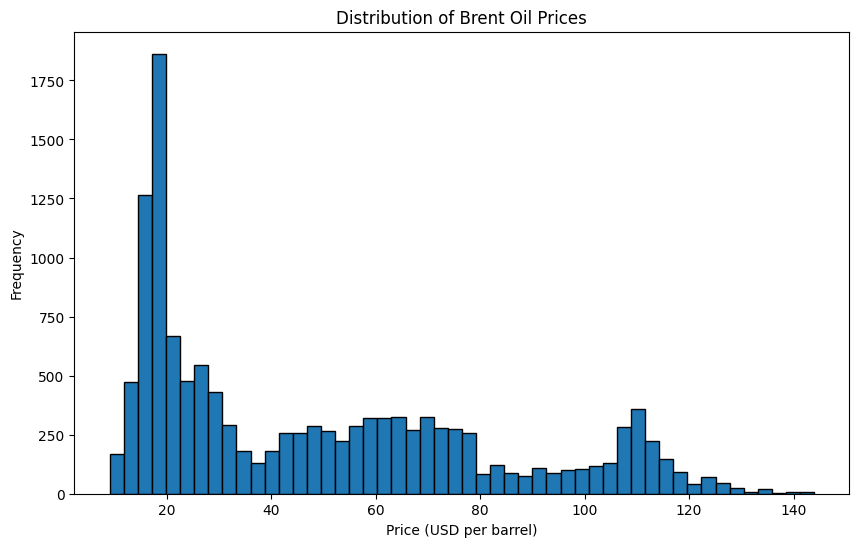

In [24]:
plt.figure(figsize=(10, 6))

data['Price'].plot(kind='hist', bins=50, edgecolor='black')
plt.title("Distribution of Brent Oil Prices")
plt.xlabel("Price (USD per barrel)")
plt.ylabel("Frequency")
plt.savefig('../reports/figure/brent_oil_price_distribution_after_filling.png')

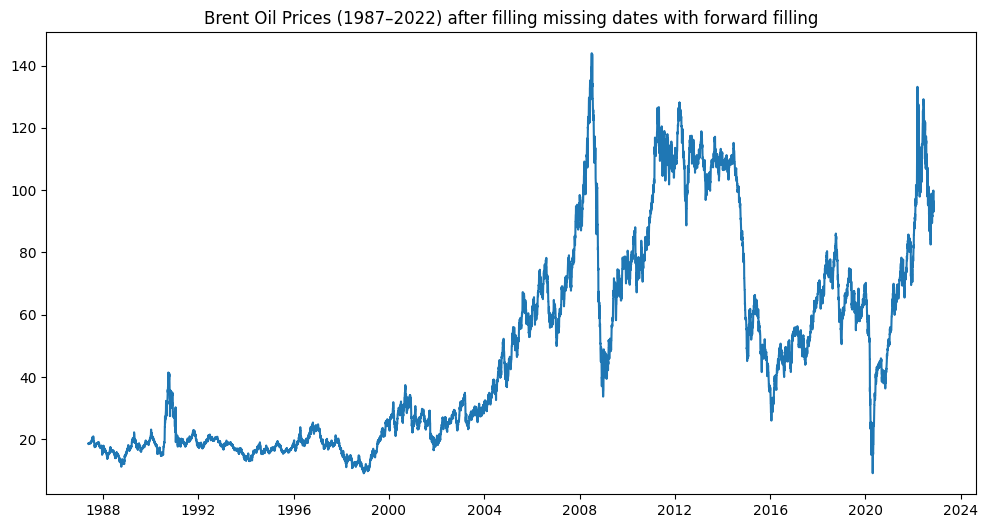

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(data['Price'])
plt.title("Brent Oil Prices (1987–2022) after filling missing dates with forward filling")

# save the plot
plt.savefig('../reports/figure/brent_oil_prices_after_filing_missed date_price.png')

In [26]:
# save cleaned data
data.to_csv('../data/BrentOilPrices_cleaned.csv')
print("Cleaned data saved to '../data/BrentOilPrices_cleaned.csv'")

Cleaned data saved to '../data/BrentOilPrices_cleaned.csv'
